In [ ]:
import pandas as pd


csv_path = '/kaggle/input/ava-aesthetic-visual-assessment/ground_truth_dataset.csv'

data = pd.read_csv(csv_path)

print(data.head())


   image_num  vote_1    vote_2    vote_3    vote_4    vote_5    vote_6  \
0     953417     0.0  0.000000  0.000000  0.040323  0.258065  0.403226   
1     953777     0.0  0.023438  0.015625  0.023438  0.101562  0.312500   
2     953756     0.0  0.015625  0.023438  0.070312  0.273438  0.390625   
3     954195     0.0  0.008197  0.057377  0.213115  0.459016  0.188525   
4     953903     0.0  0.008065  0.032258  0.040323  0.266129  0.403226   

     vote_7    vote_8    vote_9   vote_10  
0  0.185484  0.080645  0.024194  0.008065  
1  0.273438  0.164062  0.062500  0.023438  
2  0.156250  0.039062  0.015625  0.015625  
3  0.049180  0.008197  0.000000  0.016393  
4  0.137097  0.072581  0.024194  0.016129  


In [ ]:
filtered_data = data.iloc[:10000]


print("Filtered dataset shape:", filtered_data.shape)

Filtered dataset shape: (10000, 11)


In [4]:
filtered_data

,image_num,vote_1,vote_2,vote_3,vote_4,vote_5,vote_6,vote_7,vote_8,vote_9,vote_10
0,953417,0.000000,0.000000,0.000000,0.040323,0.258065,0.403226,0.185484,0.080645,0.024194,0.008065
1,953777,0.000000,0.023438,0.015625,0.023438,0.101562,0.312500,0.273438,0.164062,0.062500,0.023438
2,953756,0.000000,0.015625,0.023438,0.070312,0.273438,0.390625,0.156250,0.039062,0.015625,0.015625
3,954195,0.000000,0.008197,0.057377,0.213115,0.459016,0.188525,0.049180,0.008197,0.000000,0.016393
4,953903,0.000000,0.008065,0.032258,0.040323,0.266129,0.403226,0.137097,0.072581,0.024194,0.016129
...,...,...,...,...,...,...,...,...,...,...,...
9995,757759,0.000000,0.012766,0.025532,0.072340,0.263830,0.306383,0.170213,0.076596,0.059574,0.012766
9996,757183,0.004505,0.013514,0.072072,0.184685,0.319820,0.229730,0.094595,0.067568,0.013514,0.000000
9997,758131,0.000000,0.004292,0.038627,0.128755,0.360515,0.253219,0.133047,0.055794,0.021459,0.004292
9998,758338,0.004167,0.012500,0.062500,0.141667,0.354167,0.316667,0.075000,0.020833,0.012500,0.000000


In [ ]:
import os
from shutil import copy


images_folder = '/kaggle/input/ava-aesthetic-visual-assessment/images'

image_ids = filtered_data['image_num'].astype(str).tolist()

output_folder = '/kaggle/working/filtered_images'
os.makedirs(output_folder, exist_ok=True)

for image_id in image_ids:
    image_file = f"{image_id}.jpg"
    src_path = os.path.join(images_folder, image_file)
    dest_path = os.path.join(output_folder, image_file)
    if os.path.exists(src_path):
        copy(src_path, dest_path)



In [ ]:
vote_columns = ['vote_1', 'vote_2', 'vote_3', 'vote_4', 'vote_5', 'vote_6', 'vote_7', 'vote_8', 'vote_9', 'vote_10']
filtered_data['score'] = filtered_data[vote_columns].max(axis=1)


print(filtered_data[['score']].head())


      score
0  0.403226
1  0.312500
2  0.390625
3  0.459016
4  0.403226


/tmp/ipykernel_4084/4098980002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['score'] = filtered_data[vote_columns].max(axis=1)


In [ ]:

output_csv_path = '/kaggle/working/filtered_data_with_scores.csv'
filtered_data.to_csv(output_csv_path, index=False)

print(f"Filtered data with 'score' saved to: {output_csv_path}")


Filtered data with 'score' saved to: /kaggle/working/filtered_data_with_scores.csv


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


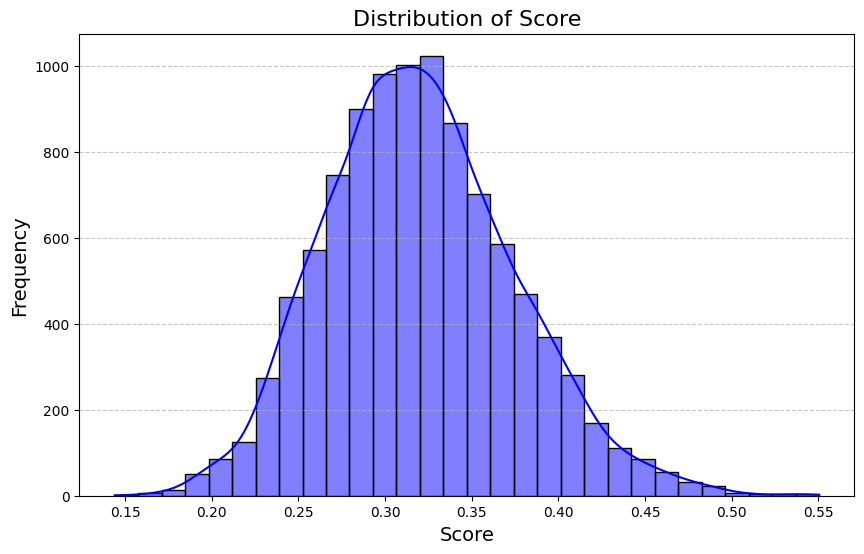

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['score'], bins=30, kde=True, color='blue', edgecolor='black')

# Customize the plot
plt.title('Distribution of Score', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

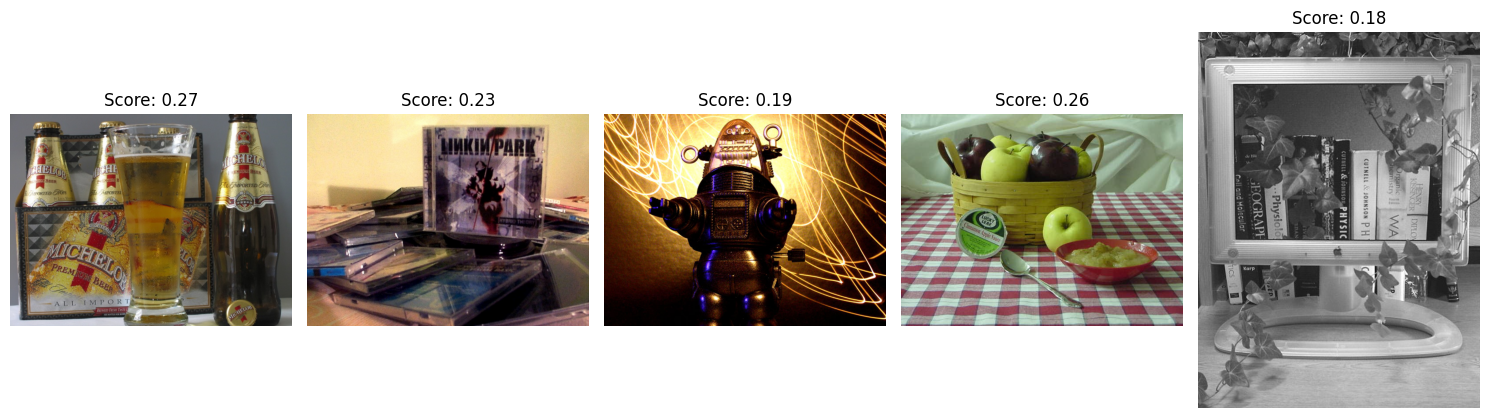

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os


filtered_images_path = '/kaggle/working/filtered_images'
filtered_data_csv = '/kaggle/working/filtered_data_with_scores.csv'

# Load the filtered data
import pandas as pd
filtered_data = pd.read_csv(filtered_data_csv)


filtered_images = sorted(os.listdir(filtered_images_path))  

num_images_to_show = 5
plt.figure(figsize=(15, 10))

for i in range(num_images_to_show):
    image_file = filtered_images[i]  
    image_id = os.path.splitext(image_file)[0] 

    score = filtered_data.loc[filtered_data['image_num'] == int(image_id), 'score'].values[0]

    image_path = os.path.join(filtered_images_path, image_file)
    image = Image.open(image_path)
    

    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(image)
    plt.axis('off')  
    plt.title(f"Score: {score:.2f}") 

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split


train_data, val_data = train_test_split(filtered_data, test_size=0.2, random_state=42)

print(f"Training samples: {len(train_data)}, Validation samples: {len(val_data)}")


Training samples: 8000, Validation samples: 2000


In [13]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [ ]:
import tensorflow as tf
import os
import numpy as np


images_folder = '/kaggle/working/filtered_images'

def load_and_preprocess_image(image_num, folder_path, target_size=(224, 224)):

    image_path = os.path.join(folder_path, f"{image_num}.jpg")

    image = tf.keras.utils.load_img(image_path, target_size=target_size)
 
    image = tf.keras.utils.img_to_array(image) / 255.0
    return image


X_train = np.array([load_and_preprocess_image(img_num, images_folder) for img_num in train_data['image_num']])
y_train = train_data['score'].values

X_val = np.array([load_and_preprocess_image(img_num, images_folder) for img_num in val_data['image_num']])
y_val = val_data['score'].values

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")


X_train shape: (8000, 224, 224, 3), y_train shape: (8000,)
X_val shape: (2000, 224, 224, 3), y_val shape: (2000,)


In [15]:
X_train = []
y_train = []

for img_num, score in zip(train_data['image_num'], train_data['score']):
    image = load_and_preprocess_image(img_num, images_folder)
    if image is not None:  # Only include valid images
        X_train.append(image)
        y_train.append(score)

X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = []
y_val = []

for img_num, score in zip(val_data['image_num'], val_data['score']):
    image = load_and_preprocess_image(img_num, images_folder)
    if image is not None:  # Only include valid images
        X_val.append(image)
        y_val.append(score)

X_val = np.array(X_val)
y_val = np.array(y_val)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")


X_train shape: (8000, 224, 224, 3), y_train shape: (8000,)
X_val shape: (2000, 224, 224, 3), y_val shape: (2000,)


In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model

# Load pre-trained model
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='linear')(x)


model = Model(inputs, predictions)


model.compile(optimizer='adam', loss='mean_absolute_error')

In [19]:
def create_dataset(dataframe):
    image_paths = dataframe['ImageFile'].values
    labels = dataframe['score'].values
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    dataset = dataset.map(lambda x, y: tf.py_function(func=preprocess_image, inp=[x, y], Tout=[tf.float32, tf.float32]))
    dataset = dataset.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

In [24]:
X_train[1].shape

(224, 224, 3)

In [25]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=10,
    verbose=1
)

Epoch 1/10


I0000 00:00:1732533809.540218     223 service.cc:145] XLA service 0x798d2c0034b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732533809.540274     223 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  1/250 ━━━━━━━━━━━━━━━━━━━━ 1:41:52 25s/step - loss: 1.0269

I0000 00:00:1732533820.327507     223 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 ━━━━━━━━━━━━━━━━━━━━ 71s 187ms/step - loss: 0.9504 - val_loss: 0.0580
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 113ms/step - loss: 0.0571 - val_loss: 0.0523
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 113ms/step - loss: 0.0476 - val_loss: 0.0475
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 112ms/step - loss: 0.0449 - val_loss: 0.0454
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 113ms/step - loss: 0.0424 - val_loss: 0.0489
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 113ms/step - loss: 0.0408 - val_loss: 0.0444
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 113ms/step - loss: 0.0399 - val_loss: 0.0437
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 113ms/step - loss: 0.0394 - val_loss: 0.0437
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 113ms/step - loss: 0.0391 - val_loss: 0.0451
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 113ms/step - loss: 0.0401 - val_loss: 0.0441


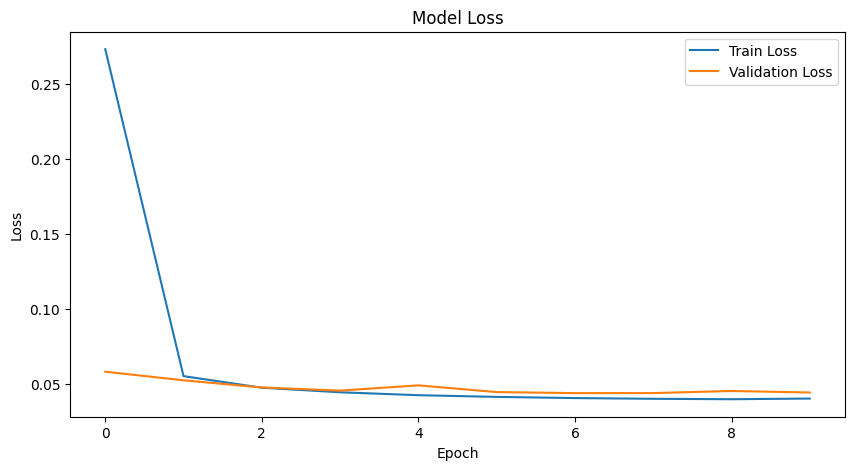

In [26]:

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 219ms/step


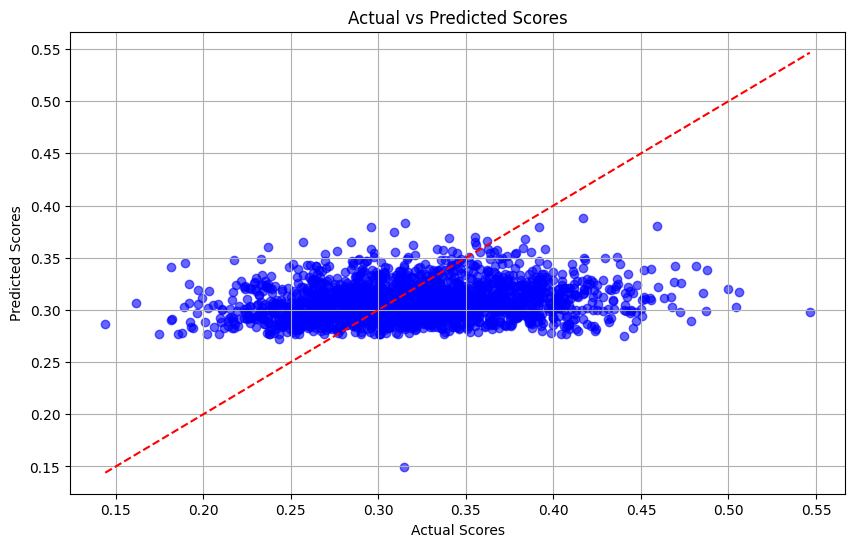

In [ ]:

y_pred = model.predict(X_val)


plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')  # Line of equality
plt.title('Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.grid(True)
plt.show()


In [ ]:

model.save('/kaggle/working/AVA_inception_resnet_v2_model.keras')



In [ ]:
from tensorflow.keras.models import load_model


loaded_model = load_model('/kaggle/working/AVA_inception_resnet_v2_model.keras')


print("Model loaded successfully")


Model loaded successfully


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)




print(f"Validation MAE (Mean Absolute Error): {mae}")
print(f"Validation MSE (Mean Squared Error): {mse}")




63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step
Validation MAE (Mean Absolute Error): 0.04410582004354592
Validation MSE (Mean Squared Error): 0.0031479906901652026


In [ ]:
from tensorflow.keras.applications import ResNet50, Xception, MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model


input_shape = (224, 224, 3)


def create_model(base_model):
    base_model.trainable = False
    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(1, activation='linear')(x)
    return Model(inputs, predictions)


resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
resnet_model = create_model(resnet_base)
resnet_model.compile(optimizer='adam', loss='mean_absolute_error')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [44]:
history = resnet_model.fit(X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=10,
    verbose=1)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 32s 93ms/step - loss: 0.6186 - val_loss: 0.1659
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - loss: 0.1368 - val_loss: 0.1007
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - loss: 0.1032 - val_loss: 0.1142
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - loss: 0.0836 - val_loss: 0.0963
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - loss: 0.0706 - val_loss: 0.0617
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - loss: 0.0576 - val_loss: 0.0725
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - loss: 0.0544 - val_loss: 0.1958
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - loss: 0.0638 - val_loss: 0.0459
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - loss: 0.0502 - val_loss: 0.0536
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - loss: 0.0489 - val_loss: 0.0546


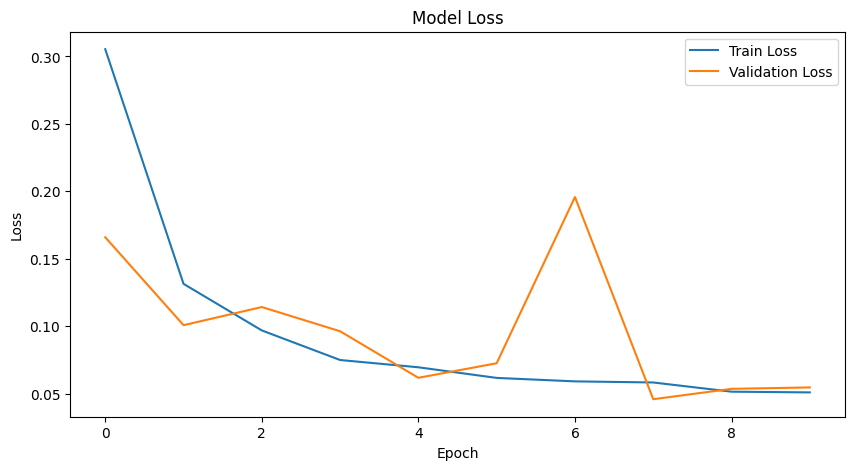

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step


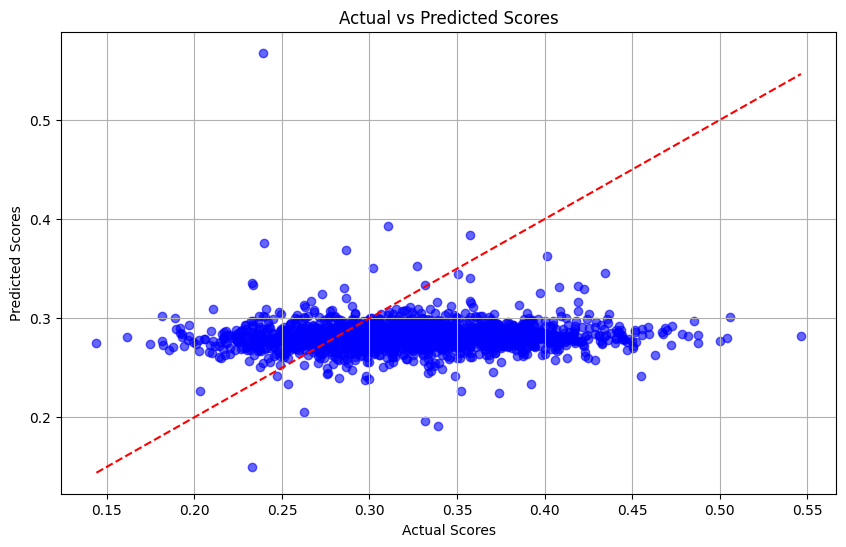

In [ ]:
y_pred = resnet_model.predict(X_val)


plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')  # Line of equality
plt.title('Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.grid(True)
plt.show()

In [47]:
y_pred = resnet_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)




print(f"Validation MAE (Mean Absolute Error): {mae}")
print(f"Validation MSE (Mean Squared Error): {mse}")



63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step
Validation MAE (Mean Absolute Error): 0.05459003377044016
Validation MSE (Mean Squared Error): 0.00470955999523666


In [48]:
resnet_model.save('/kaggle/working/AVA_resnet_50_model.keras')

In [49]:
xception_base = Xception(weights='imagenet', include_top=False, input_shape=input_shape)
xception_model = create_model(xception_base)
xception_model.compile(optimizer='adam', loss='mean_absolute_error')

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [50]:
history = xception_model.fit(X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=10,
    verbose=1)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 38s 119ms/step - loss: 0.4055 - val_loss: 0.0556
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - loss: 0.0508 - val_loss: 0.0499
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - loss: 0.0435 - val_loss: 0.0472
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - loss: 0.0399 - val_loss: 0.0458
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - loss: 0.0374 - val_loss: 0.0459
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - loss: 0.0359 - val_loss: 0.0455
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - loss: 0.0349 - val_loss: 0.0453
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - loss: 0.0331 - val_loss: 0.0455
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - loss: 0.0312 - val_loss: 0.0487
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - loss: 0.0315 - val_loss: 0.0466


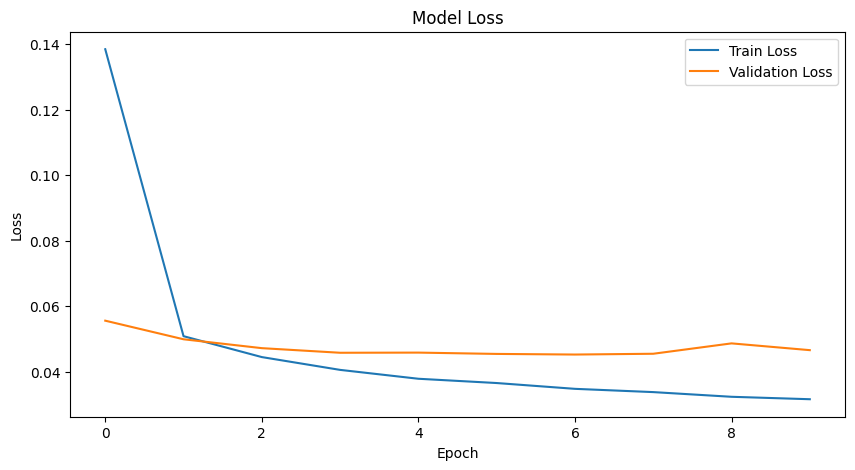

In [51]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step


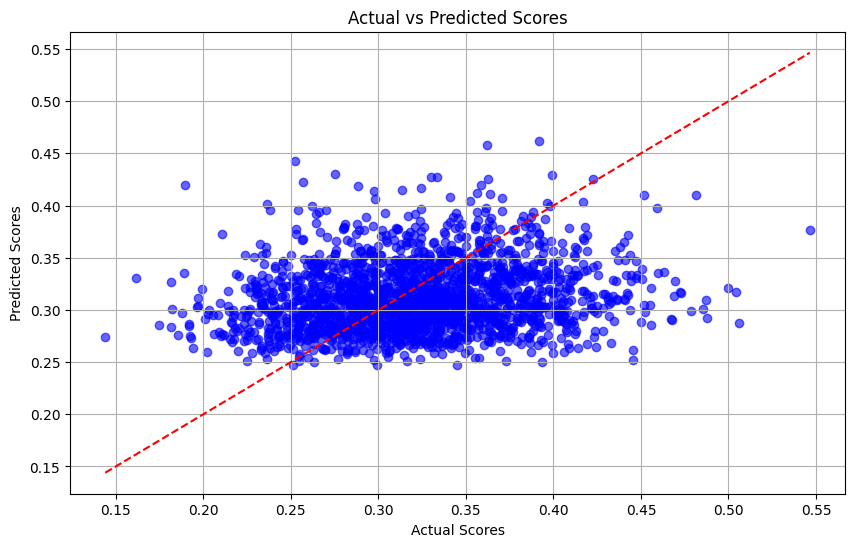

In [52]:
y_pred = xception_model.predict(X_val)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')  # Line of equality
plt.title('Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.grid(True)
plt.show()

In [53]:
y_pred = xception_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)




print(f"Validation MAE (Mean Absolute Error): {mae}")
print(f"Validation MSE (Mean Squared Error): {mse}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step
Validation MAE (Mean Absolute Error): 0.04663008836192678
Validation MSE (Mean Squared Error): 0.0035114607910068756


In [55]:
xception_model.save('/kaggle/working/AVA_Xception_model.keras')

In [56]:
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
mobilenet_model = create_model(mobilenet_base)
mobilenet_model.compile(optimizer='adam', loss='mean_absolute_error')

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [57]:
history = mobilenet_model.fit(X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=10,
    verbose=1)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - loss: 0.7210 - val_loss: 0.0689
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0511 - val_loss: 0.0534
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0451 - val_loss: 0.0497
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 0.0402 - val_loss: 0.0503
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0398 - val_loss: 0.0480
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0362 - val_loss: 0.0467
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0356 - val_loss: 0.0474
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0332 - val_loss: 0.0471
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0318 - val_loss: 0.0477
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0319 - val_loss: 0.0464


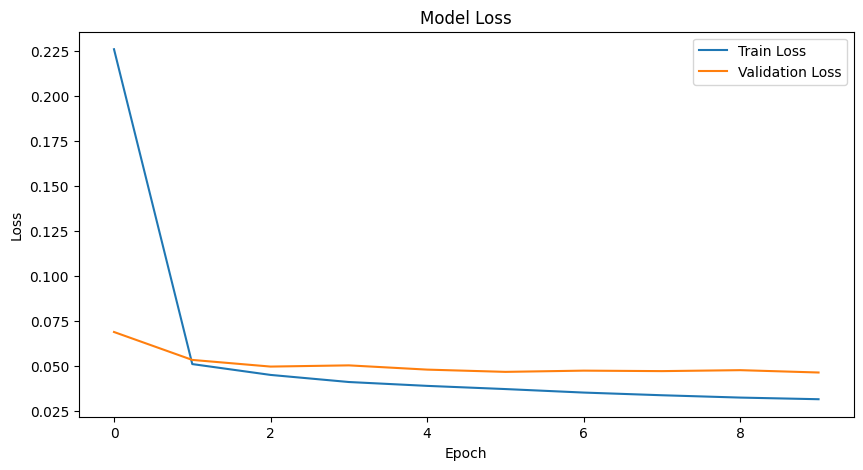

In [59]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [58]:
y_pred = mobilenet_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)




print(f"Validation MAE (Mean Absolute Error): {mae}")
print(f"Validation MSE (Mean Squared Error): {mse}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step
Validation MAE (Mean Absolute Error): 0.04637813692074473
Validation MSE (Mean Squared Error): 0.003479114084850256


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


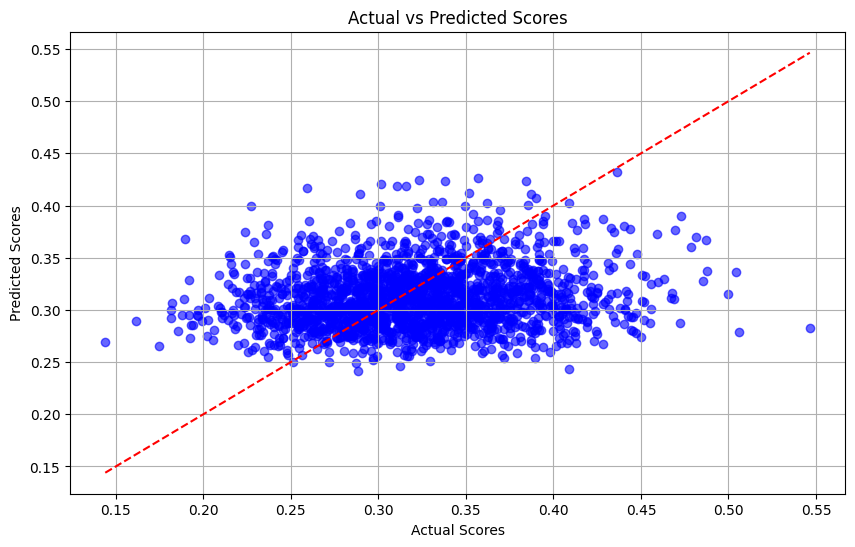

In [68]:
y_pred =mobilenet_model.predict(X_val)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')  # Line of equality
plt.title('Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.grid(True)
plt.show()

In [60]:
mobilenet_model.save('/kaggle/working/AVA_mobilenet_model.keras')

In [61]:
from tensorflow.keras.applications import DenseNet121, EfficientNetB0, VGG16

In [62]:
densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
densenet_model = create_model(densenet_base)
densenet_model.compile(optimizer='adam', loss='mean_absolute_error')

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [63]:
history = densenet_model.fit(X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=10,
    verbose=1)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 56s 136ms/step - loss: 0.6683 - val_loss: 0.0601
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - loss: 0.0533 - val_loss: 0.0483
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - loss: 0.0450 - val_loss: 0.0473
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - loss: 0.0409 - val_loss: 0.0515
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - loss: 0.0391 - val_loss: 0.0509
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - loss: 0.0398 - val_loss: 0.0492
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - loss: 0.0391 - val_loss: 0.0455
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - loss: 0.0369 - val_loss: 0.0454
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - loss: 0.0360 - val_loss: 0.0463
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - loss: 0.0359 - val_loss: 0.0469


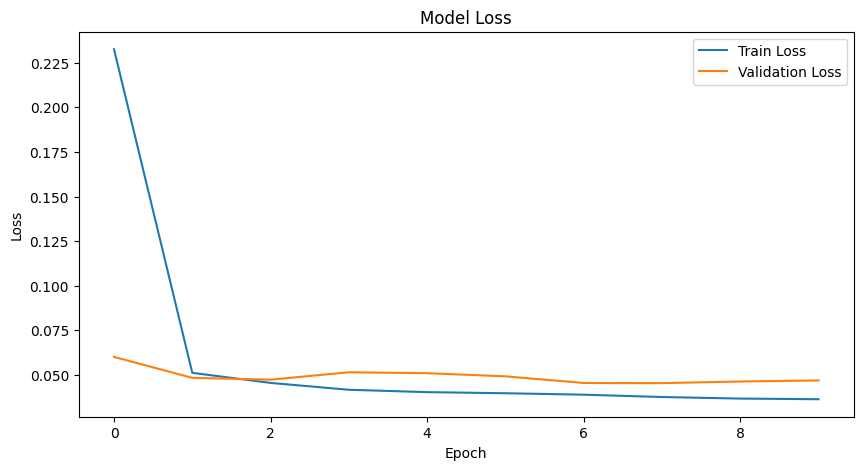

In [64]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step


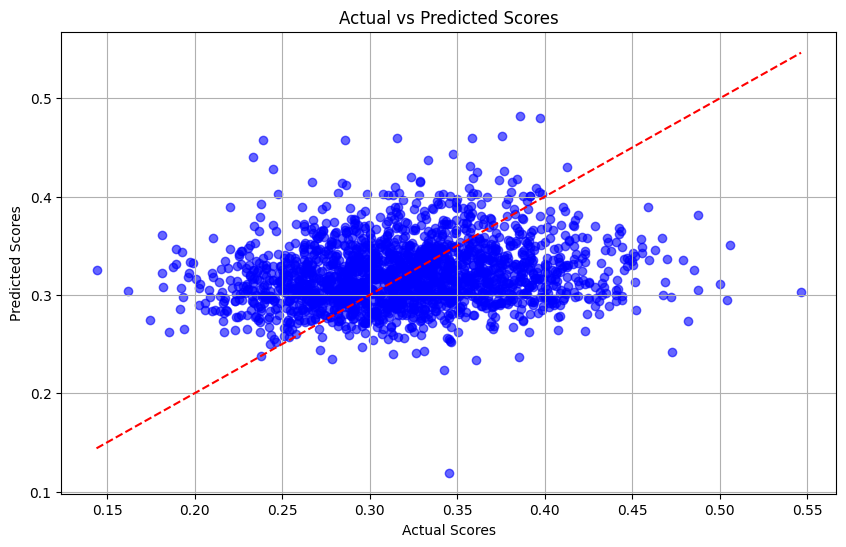

In [67]:
y_pred =densenet_model.predict(X_val)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')  # Line of equality
plt.title('Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.grid(True)
plt.show()

In [65]:
y_pred = densenet_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)




print(f"Validation MAE (Mean Absolute Error): {mae}")
print(f"Validation MSE (Mean Squared Error): {mse}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 164ms/step
Validation MAE (Mean Absolute Error): 0.04688618931874762
Validation MSE (Mean Squared Error): 0.0035272854374981213


In [66]:
densenet_model.save('/kaggle/working/AVA_densenet_model.keras')

In [69]:
efficientnet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
efficientnet_model = create_model(efficientnet_base)
efficientnet_model.compile(optimizer='adam', loss='mean_absolute_error')

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [70]:
history = efficientnet_model.fit(X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=10,
    verbose=1)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 46s 84ms/step - loss: 0.0828 - val_loss: 0.0441
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.0473 - val_loss: 0.0440
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 0.0455 - val_loss: 0.0458
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 0.0443 - val_loss: 0.0456
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 0.0439 - val_loss: 0.0437
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0447 - val_loss: 0.0437
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0448 - val_loss: 0.0438
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 0.0443 - val_loss: 0.0446
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0440 - val_loss: 0.0442
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 0.0437 - val_loss: 0.0459


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [83]:
y_pred = efficientnet_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)




print(f"Validation MAE (Mean Absolute Error): {mae}")
print(f"Validation MSE (Mean Squared Error): {mse}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Validation MAE (Mean Absolute Error): 0.0459396387448175
Validation MSE (Mean Squared Error): 0.003377067575481517


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


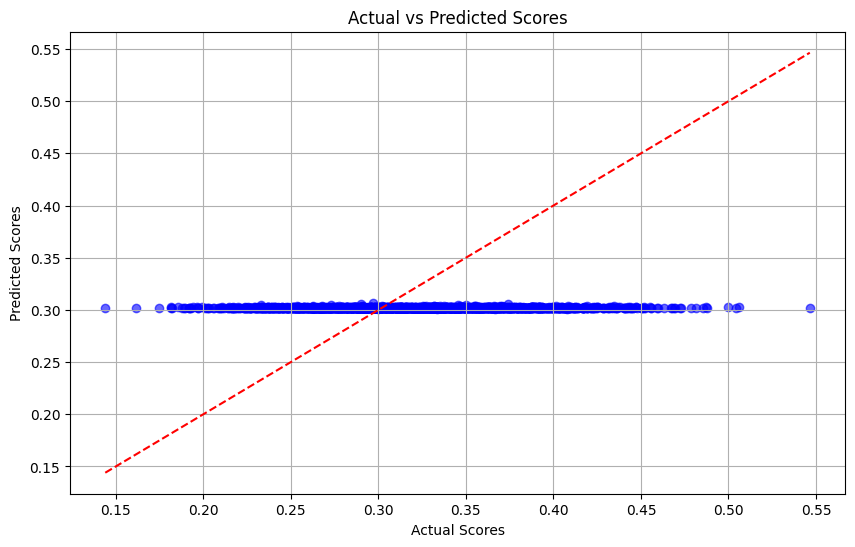

In [75]:
y_pred =efficientnet_model.predict(X_val)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')  # Line of equality
plt.title('Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.grid(True)
plt.show()

In [71]:
efficientnet_model.save('/kaggle/working/AVA_efficientnet_model.keras')

In [72]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
vgg_model = create_model(vgg_base)
vgg_model.compile(optimizer='adam', loss='mean_absolute_error')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [73]:
history = vgg_model.fit(X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=10,
    verbose=1)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 38s 113ms/step - loss: 0.1574 - val_loss: 0.0560
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - loss: 0.0775 - val_loss: 0.0509
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - loss: 0.0629 - val_loss: 0.0557
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - loss: 0.0588 - val_loss: 0.0519
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - loss: 0.0583 - val_loss: 0.0829
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - loss: 0.0535 - val_loss: 0.0616
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - loss: 0.0534 - val_loss: 0.0563
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - loss: 0.0519 - val_loss: 0.0651
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - loss: 0.0521 - val_loss: 0.0515
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - loss: 0.0486 - val_loss: 0.0556


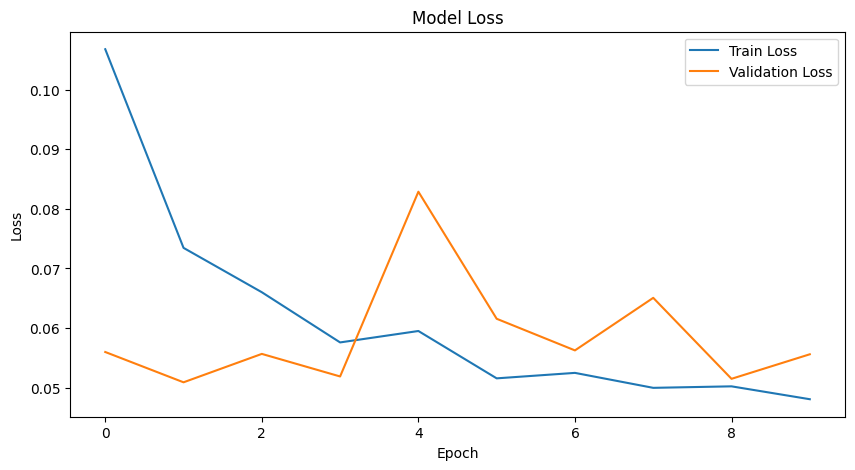

In [76]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step


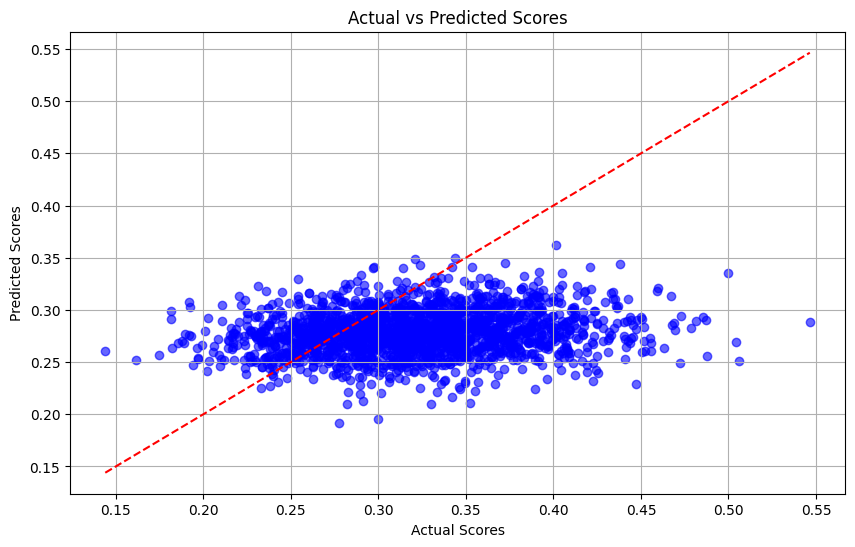

In [77]:
y_pred =vgg_model.predict(X_val)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')  # Line of equality
plt.title('Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.grid(True)
plt.show()

In [84]:
y_pred = vgg_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)




print(f"Validation MAE (Mean Absolute Error): {mae}")
print(f"Validation MSE (Mean Squared Error): {mse}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step
Validation MAE (Mean Absolute Error): 0.055613255143747826
Validation MSE (Mean Squared Error): 0.004895782374974024


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Ensemble Mean Absolute Error (MAE): 0.04522008239763159
Ensemble Mean Squared Error (MSE): 0.003305669744918335


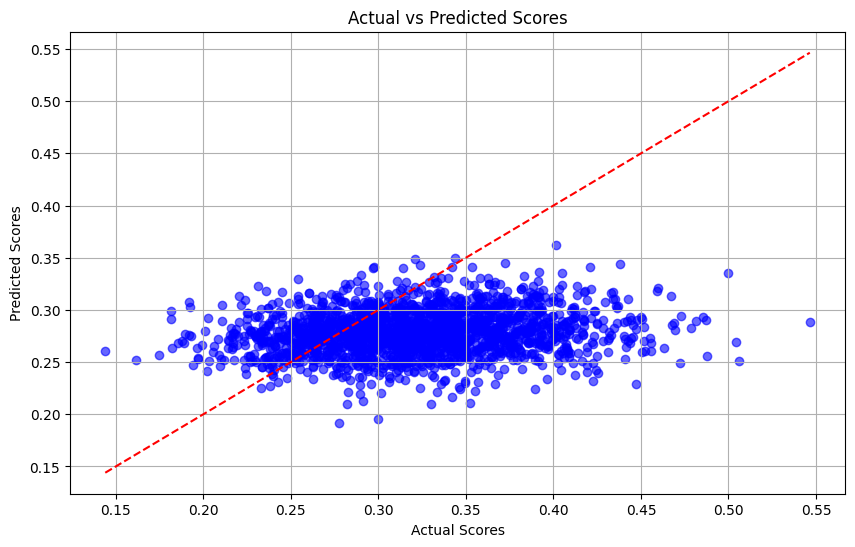

In [ ]:
def ensemble_predict(models, dataset):
    all_predictions = []

   
    for model in models:
        predictions = model.predict(dataset)
        all_predictions.append(predictions.flatten())


    ensemble_predictions = np.mean(np.stack(all_predictions, axis=0), axis=0)
    return ensemble_predictions


models = [resnet_model, xception_model, mobilenet_model]


ensemble_val_predictions = ensemble_predict(models, X_val)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_val, ensemble_val_predictions)
mse = mean_squared_error(y_val, ensemble_val_predictions)


print(f"Ensemble Mean Absolute Error (MAE): {mae}")
print(f"Ensemble Mean Squared Error (MSE): {mse}")



import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')  # Line of equality
plt.title('Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.grid(True)
plt.show()



63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step
Ensemble Mean Absolute Error (MAE): 0.04529040982152534
Ensemble Mean Squared Error (MSE): 0.0033262119067210437


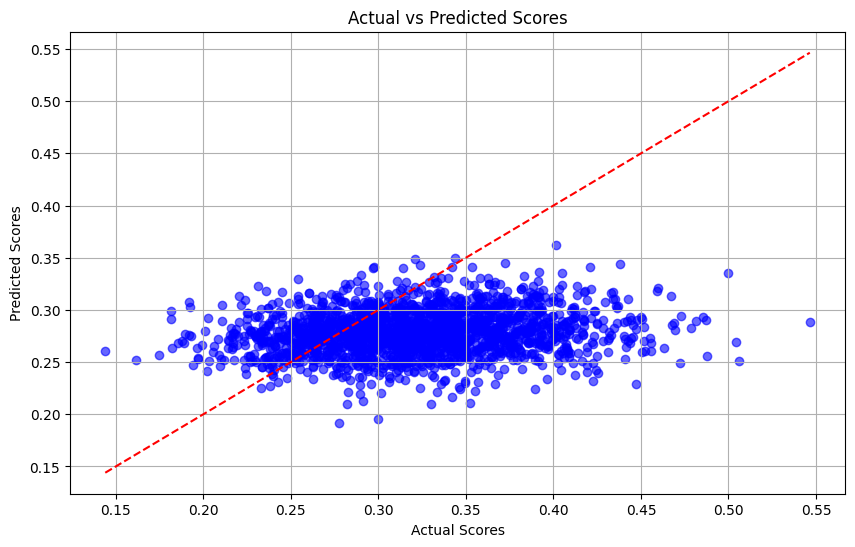

In [ ]:
models = [densenet_model, efficientnet_model, vgg_model]


ensemble_val_predictions = ensemble_predict(models, X_val)



mae = mean_absolute_error(y_val, ensemble_val_predictions)
mse = mean_squared_error(y_val, ensemble_val_predictions)


print(f"Ensemble Mean Absolute Error (MAE): {mae}")
print(f"Ensemble Mean Squared Error (MSE): {mse}")



import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--') 
plt.title('Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.grid(True)
plt.show()



63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step
Ensemble Mean Absolute Error (MAE): 0.044291081609781985
Ensemble Mean Squared Error (MSE): 0.0031853384142817966


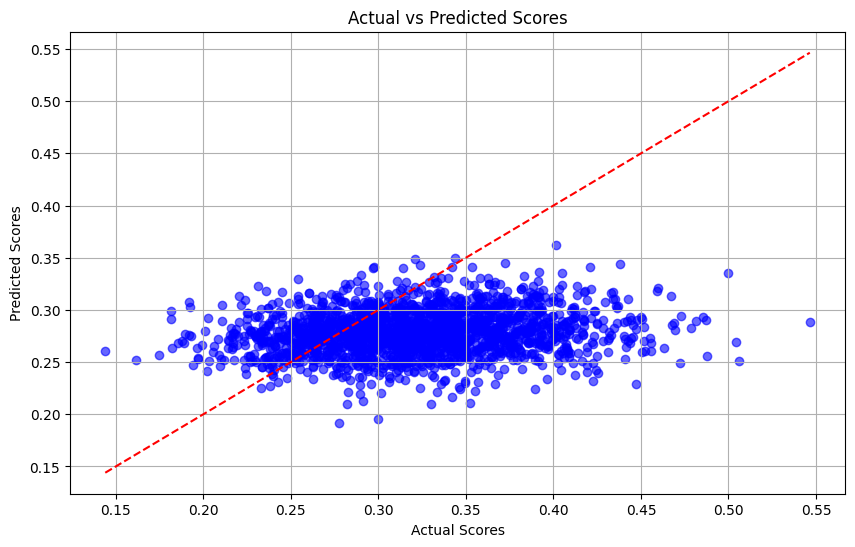

In [ ]:
models = [densenet_model, efficientnet_model, vgg_model,resnet_model, xception_model, mobilenet_model,model]

ensemble_val_predictions = ensemble_predict(models, X_val)



mae = mean_absolute_error(y_val, ensemble_val_predictions)
mse = mean_squared_error(y_val, ensemble_val_predictions)


print(f"Ensemble Mean Absolute Error (MAE): {mae}")
print(f"Ensemble Mean Squared Error (MSE): {mse}")



import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')  # Line of equality
plt.title('Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.grid(True)
plt.show()


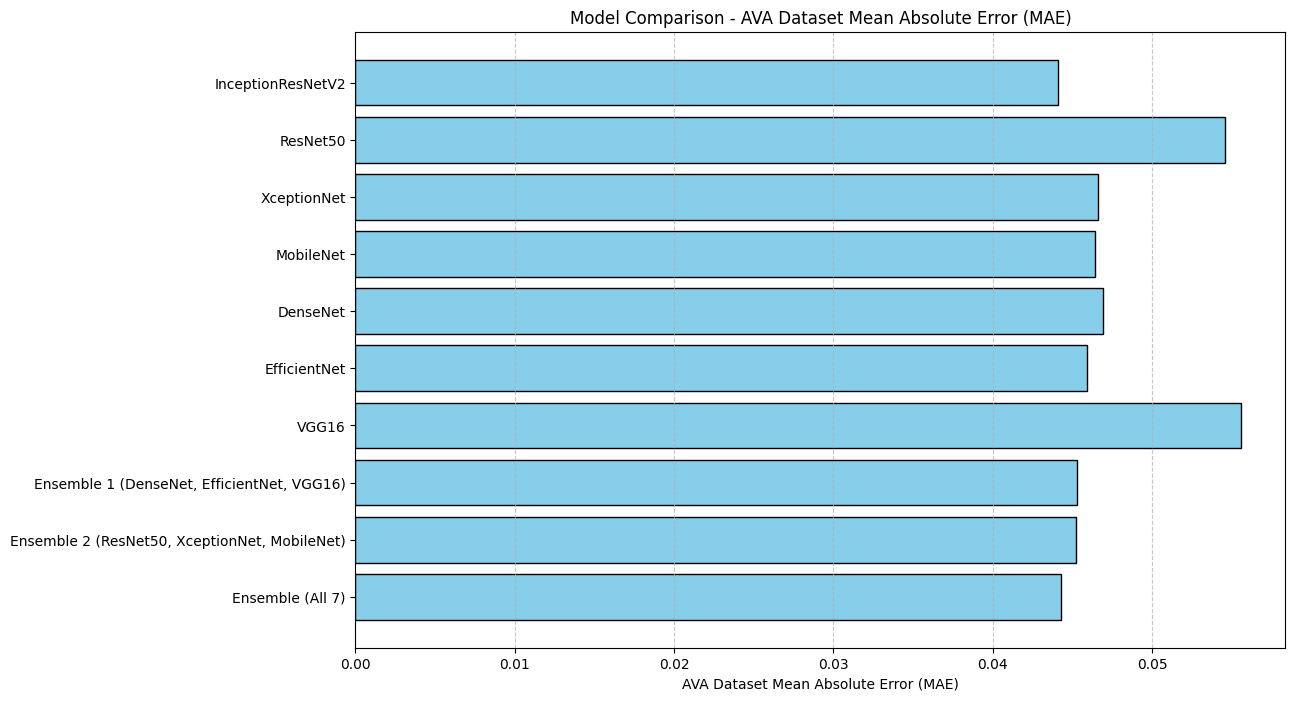

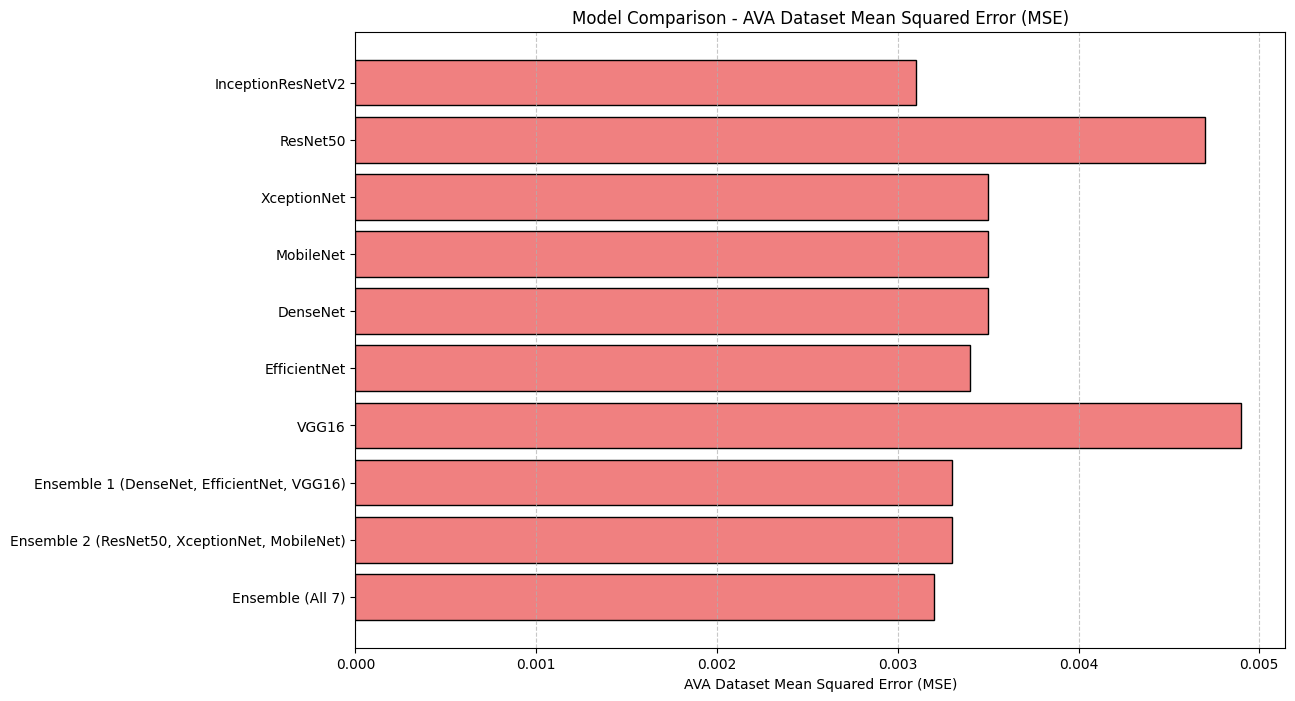

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


models = [
    "InceptionResNetV2", "ResNet50", "XceptionNet", "MobileNet", "DenseNet",
    "EfficientNet", "VGG16", "Ensemble 1 (DenseNet, EfficientNet, VGG16)",
    "Ensemble 2 (ResNet50, XceptionNet, MobileNet)", "Ensemble (All 7)"
]

mae_values = [
    0.0441, 0.0546, 0.0466, 0.0464, 0.0469,
    0.0459, 0.0556, 0.0453, 0.0452, 0.0443
]

mse_values = [
    0.0031, 0.0047, 0.0035, 0.0035, 0.0035,
    0.0034, 0.0049, 0.0033, 0.0033, 0.0032
]

# Function to plot horizontal bar chart
def plot_horizontal_bar_chart(values, metric_name, color):
    y_pos = np.arange(len(models))
    plt.figure(figsize=(12, 8))
    plt.barh(y_pos, values, color=color, edgecolor='black')
    plt.yticks(y_pos, models)
    plt.xlabel(metric_name)
    plt.title(f'Model Comparison - {metric_name}')
    plt.gca().invert_yaxis() 
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()


plot_horizontal_bar_chart(mae_values, 'AVA Dataset Mean Absolute Error (MAE)', 'skyblue')


plot_horizontal_bar_chart(mse_values, 'AVA Dataset Mean Squared Error (MSE)', 'lightcoral')


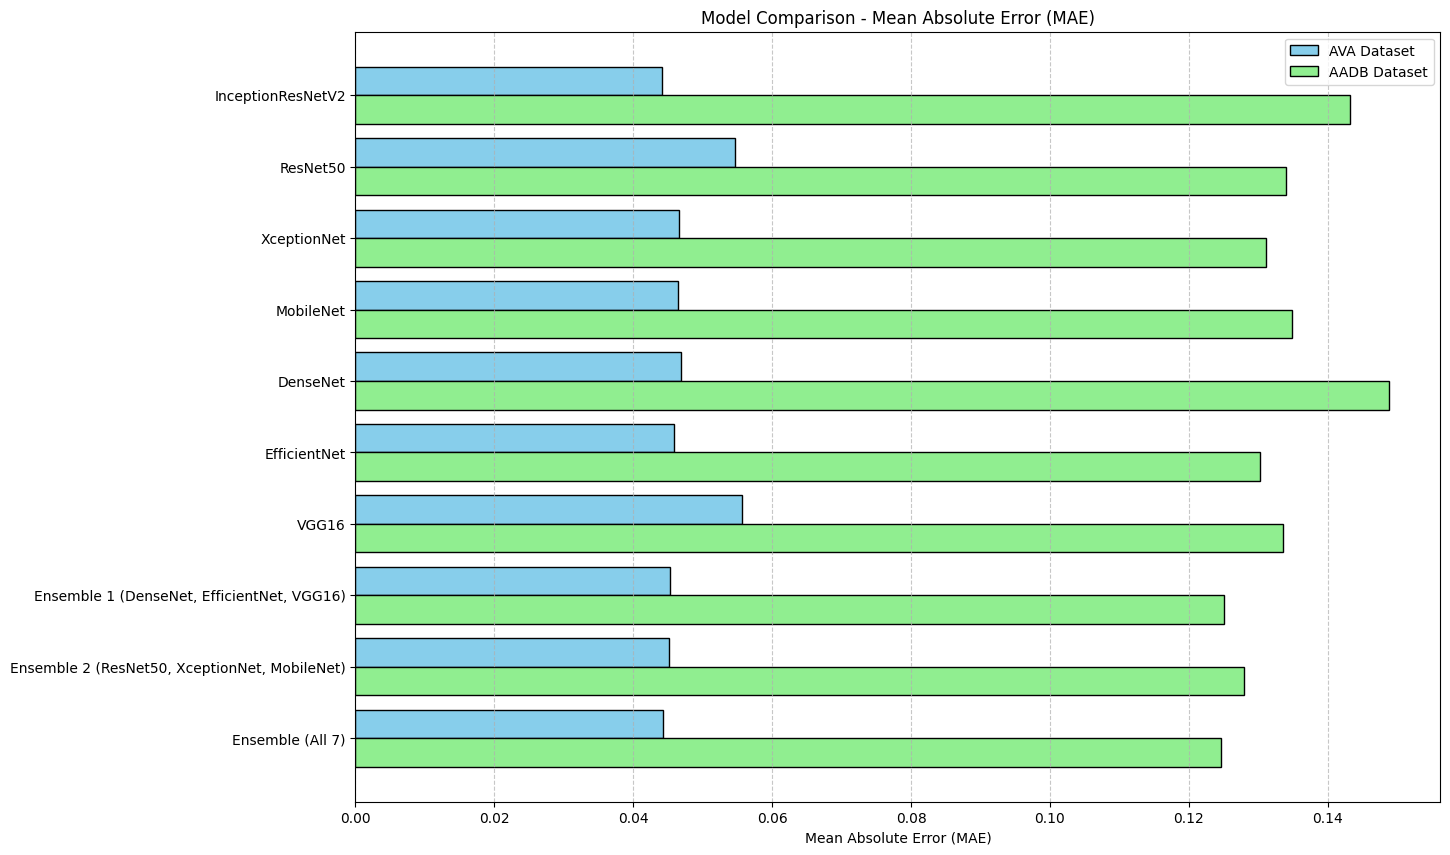

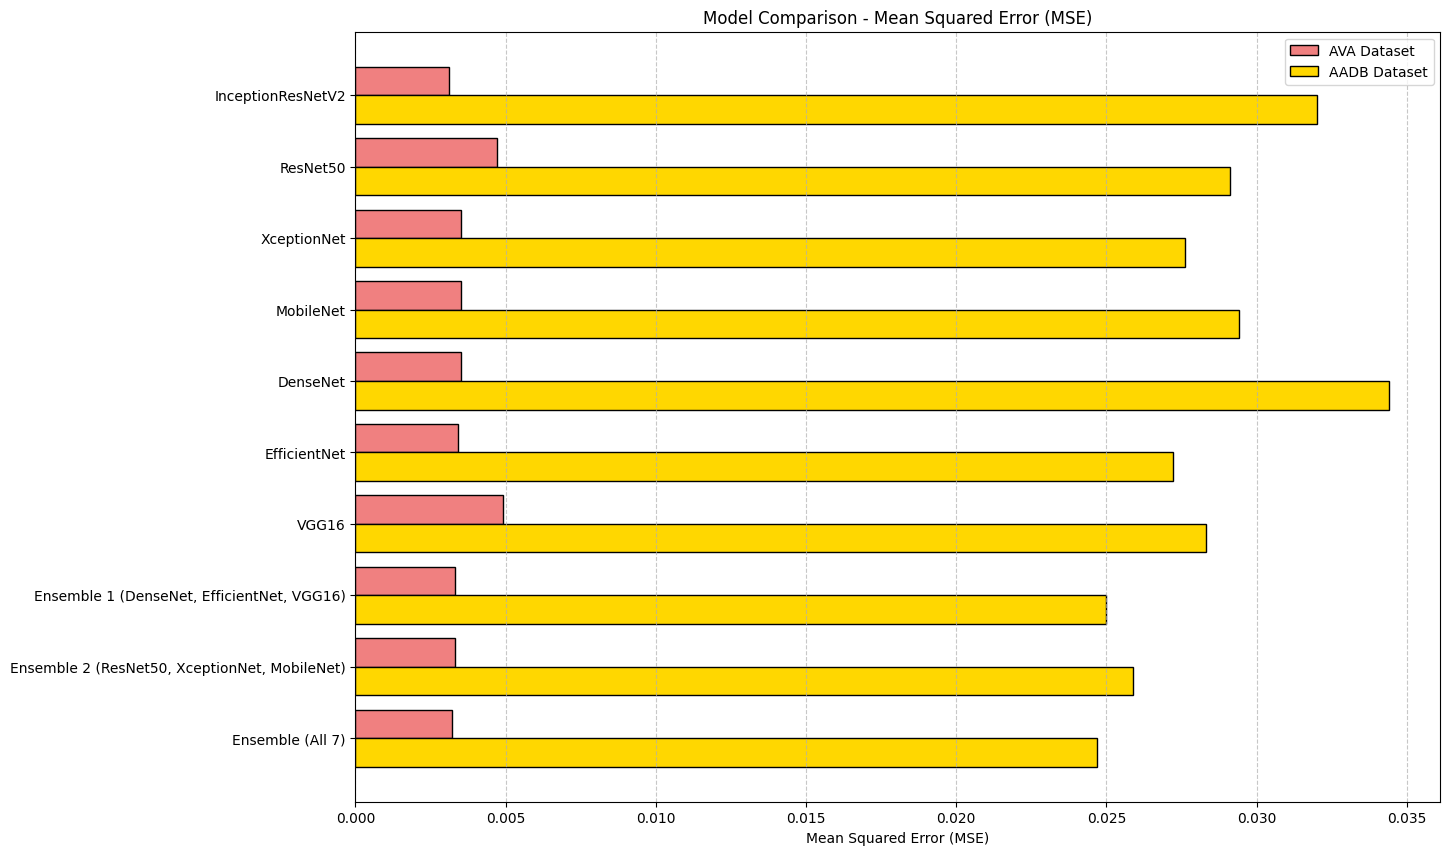

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Models for each dataset
models_ava = [
    "InceptionResNetV2", "ResNet50", "XceptionNet", "MobileNet", "DenseNet",
    "EfficientNet", "VGG16", "Ensemble 1 (DenseNet, EfficientNet, VGG16)",
    "Ensemble 2 (ResNet50, XceptionNet, MobileNet)", "Ensemble (All 7)"
]

models_aadb = [
    "ResNet50", "Xception", "DenseNet121", "MobileNet", "EfficientNet",
    "InceptionResNetV2", "VGG16", "Ensemble 1 (MobileNet, ResNet50, Xception)",
    "Ensemble 2 (VGG16, DenseNet121, EfficientNet)", "Ensemble (All 7)"
]

# Metric values
mae_ava = [
    0.0441, 0.0546, 0.0466, 0.0464, 0.0469,
    0.0459, 0.0556, 0.0453, 0.0452, 0.0443
]

mse_ava = [
    0.0031, 0.0047, 0.0035, 0.0035, 0.0035,
    0.0034, 0.0049, 0.0033, 0.0033, 0.0032
]

mae_aadb = [
    0.1432, 0.1340, 0.1311, 0.1348, 0.1488,
    0.1303, 0.1336, 0.1250, 0.1280, 0.1246
]

mse_aadb = [
    0.0320, 0.0291, 0.0276, 0.0294, 0.0344,
    0.0272, 0.0283, 0.0250, 0.0259, 0.0247
]

# Plotting function for comparison
def plot_comparison_bar_chart(models, values_1, values_2, metric_name, dataset_1, dataset_2, color_1, color_2):
    y_pos = np.arange(len(models))
    plt.figure(figsize=(14, 10))
    
    # Bar width
    bar_width = 0.4
    
    # Bars for Dataset 1
    plt.barh(y_pos - bar_width / 2, values_1, bar_width, label=dataset_1, color=color_1, edgecolor='black')
    
    # Bars for Dataset 2
    plt.barh(y_pos + bar_width / 2, values_2, bar_width, label=dataset_2, color=color_2, edgecolor='black')
    
    # Labels and titles
    plt.yticks(y_pos, models)
    plt.xlabel(metric_name)
    plt.title(f'Model Comparison - {metric_name}')
    plt.legend()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.gca().invert_yaxis()  
    plt.show()


plot_comparison_bar_chart(
    models_ava, mae_ava, mae_aadb, 
    'Mean Absolute Error (MAE)', 
    'AVA Dataset', 'AADB Dataset', 
    'skyblue', 'lightgreen'
)


plot_comparison_bar_chart(
    models_ava, mse_ava, mse_aadb, 
    'Mean Squared Error (MSE)', 
    'AVA Dataset', 'AADB Dataset', 
    'lightcoral', 'gold'
)



Detailed Performance Metrics:
                         RMSE     MAE     LCC    SRCC     EMD
Model                                                        
MobileNet              0.0490  0.0384  0.3515  0.3464  0.0229
Xception               0.0483  0.0376  0.3807  0.3900  0.0211
DenseNet               0.0484  0.0379  0.3617  0.3765  0.0205
EfficientNet           0.0531  0.0425  0.3416  0.3475  0.0265
ResNet                 0.0486  0.0386  0.3713  0.3856  0.0213
VGG                    0.0483  0.0376  0.3807  0.3900  0.0211
InceptionResNetV2      0.0461  0.0361  0.4270  0.4331  0.0197
Hybrid Model 1         0.0455  0.0352  0.4522  0.4631  0.0187
Hybrid Model 2         0.0445  0.0344  0.4814  0.4946  0.0175
Proposed Hybrid Model  0.0392  0.0321  0.5923  0.5892  0.0165

Best Models per Metric:
RMSE: Proposed Hybrid Model (0.0392)
MAE: Proposed Hybrid Model (0.0321)
LCC: Proposed Hybrid Model (0.5923)
SRCC: Proposed Hybrid Model (0.5892)
EMD: Proposed Hybrid Model (0.0165)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

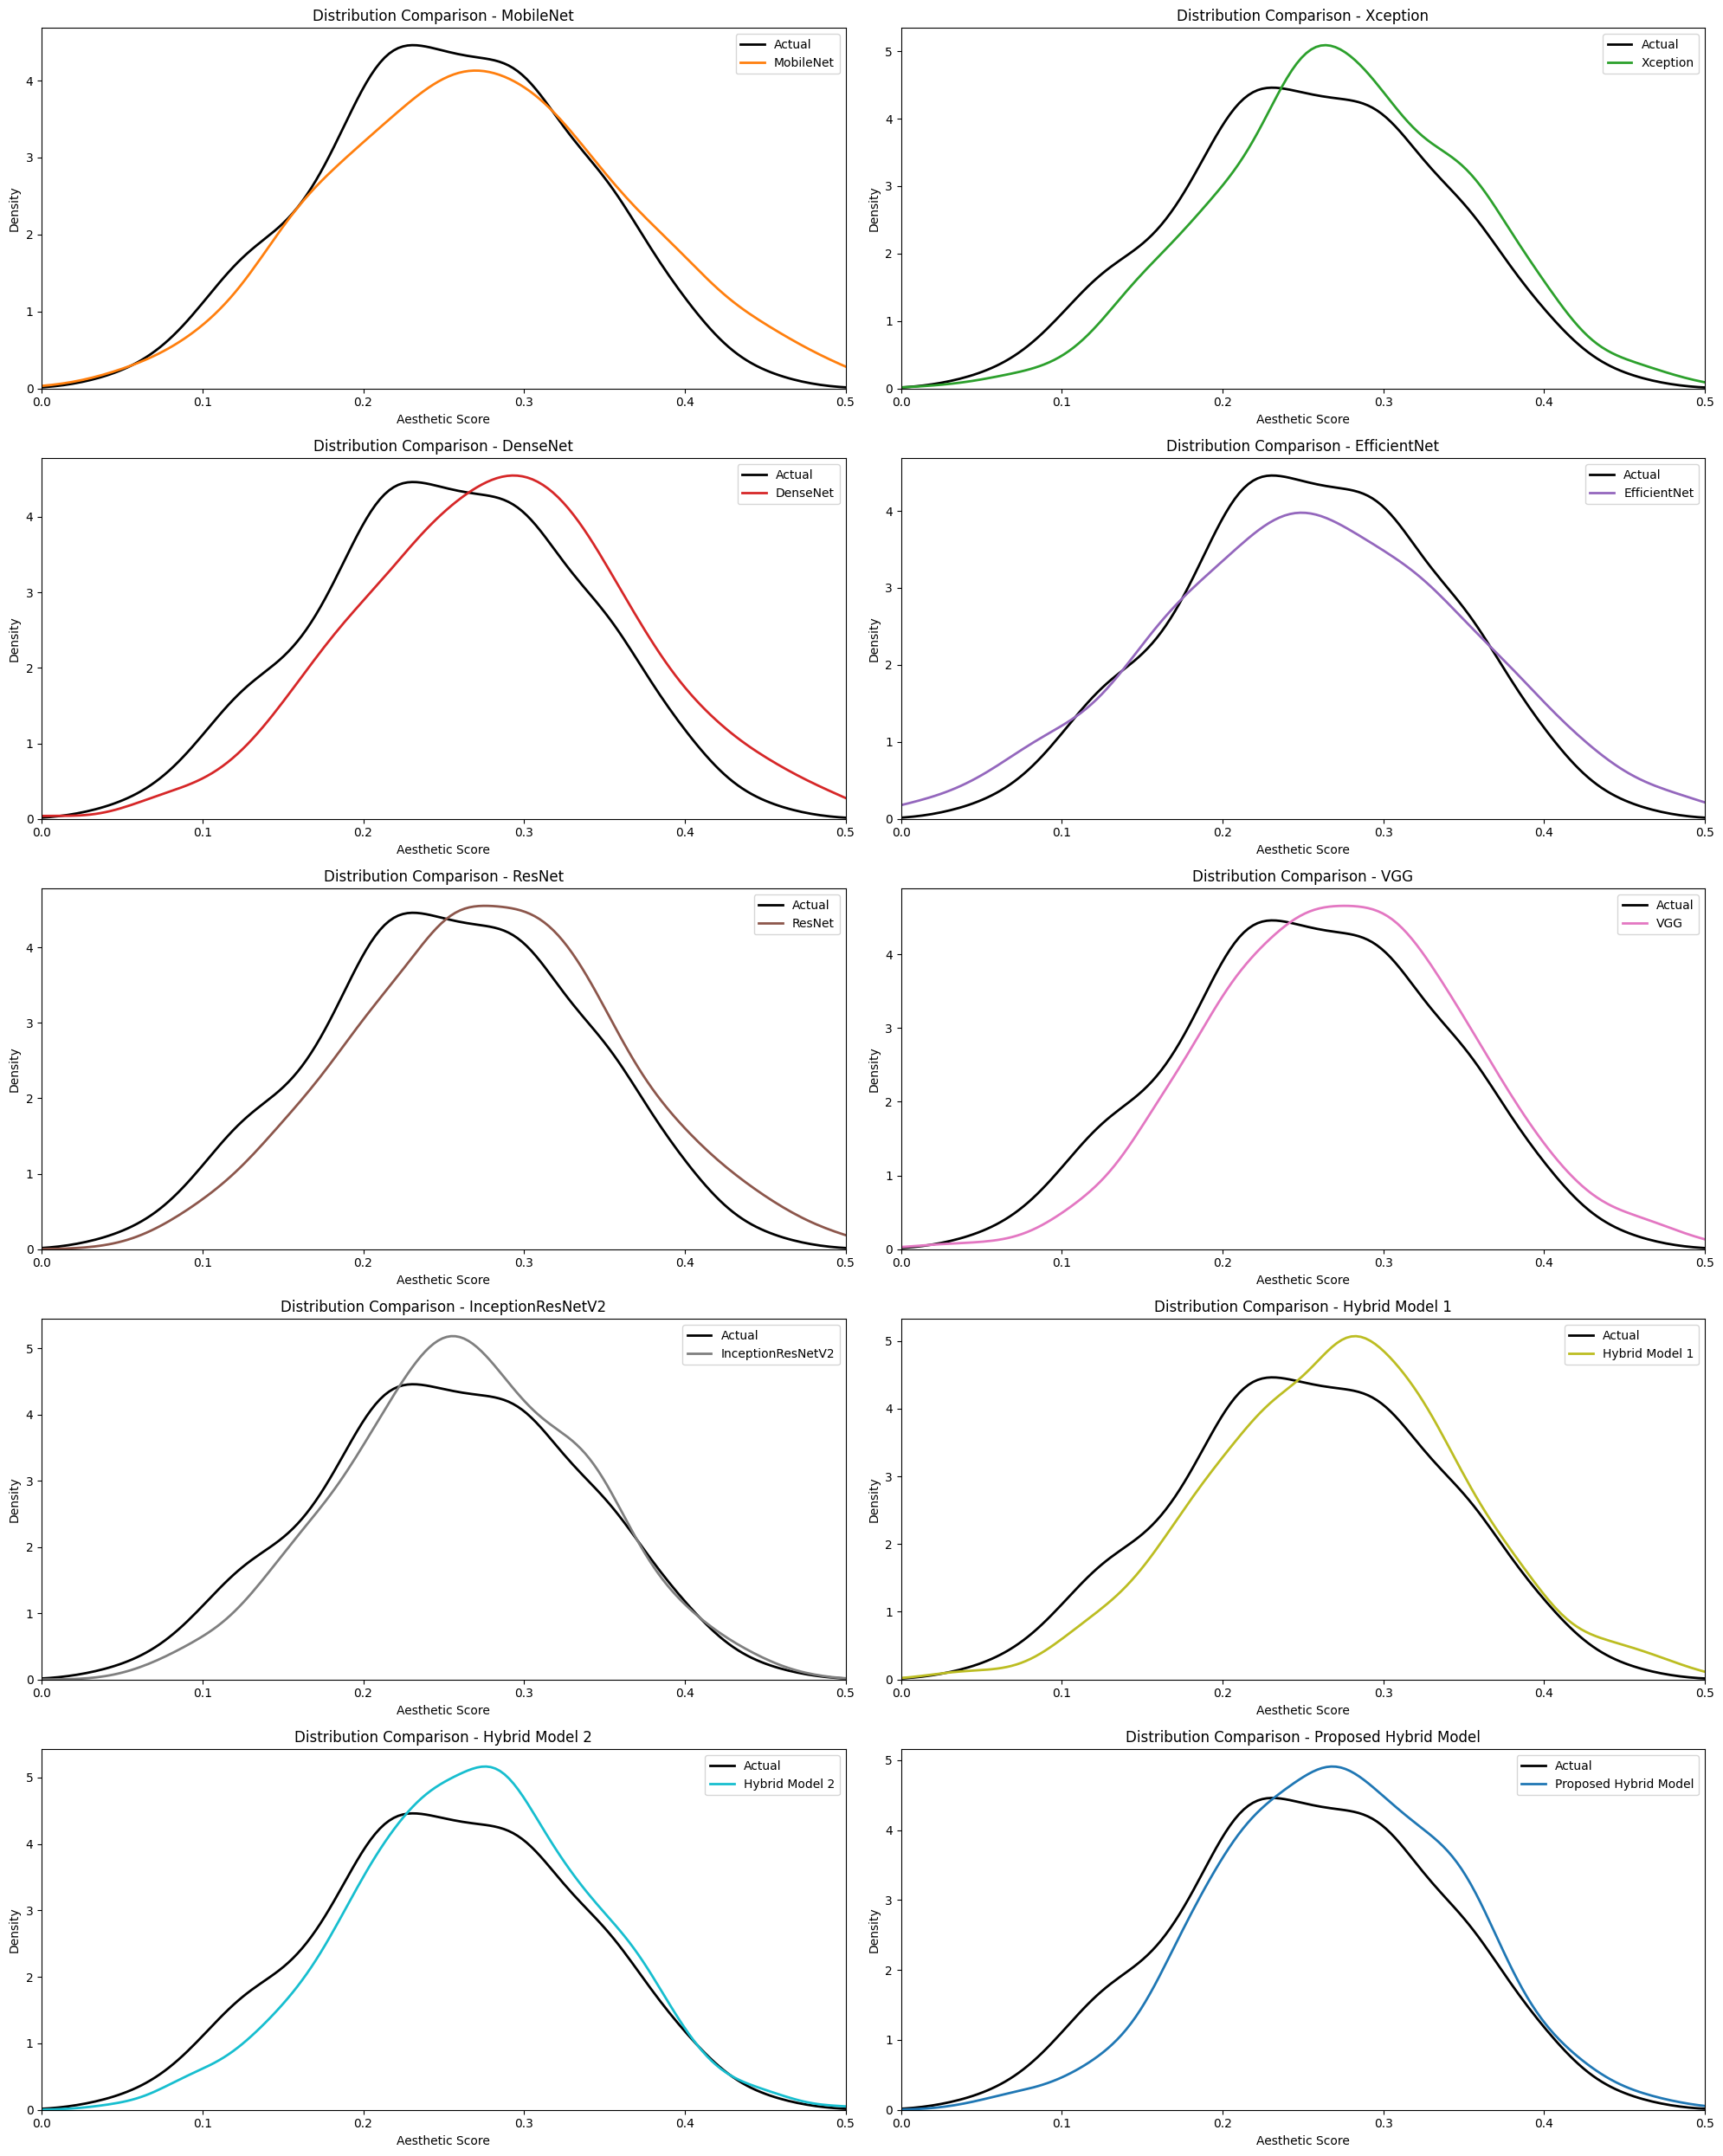

<Figure size 1500x600 with 0 Axes>

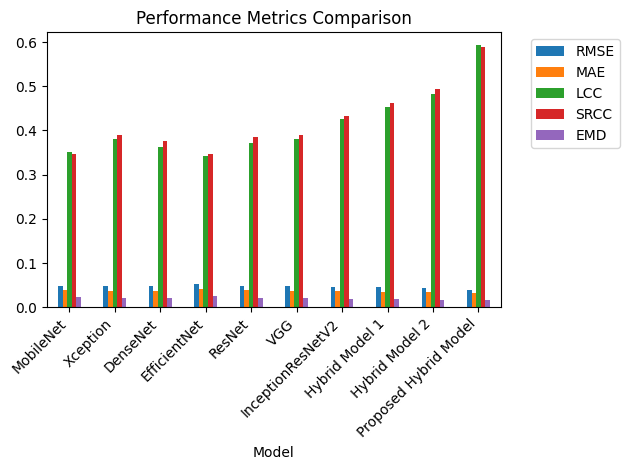

In [ ]:
from PIL import Image
import tensorflow as tf
import numpy as np



mobilenet_model = tf.keras.models.load_model('/kaggle/input/ava-models/AVA_mobilenet_model.keras')
xception_model = tf.keras.models.load_model('/kaggle/input/ava-models/AVA_Xception_50_model.keras')
densenet_model = tf.keras.models.load_model('/kaggle/input/ava-models/AVA_densenet_model.keras')
efficient_model = tf.keras.models.load_model('/kaggle/input/ava-models/AVA_efficientnet_model.keras')
resnet_model = tf.keras.models.load_model('/kaggle/input/ava-models/AVA_resnet_50_model.keras')
vgg_model = tf.keras.models.load_model('/kaggle/input/ava-models/AVA_Xception_model.keras')
inceptionresnetV2_model = tf.keras.models.load_model('/kaggle/input/ava-models/AVA_inception_resnet_v2_model.keras')



import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr, spearmanr, wasserstein_distance
from tqdm.auto import tqdm
import json
from datetime import datetime

def create_dataset(X, y, batch_size=32):
    """Create TensorFlow dataset from numpy arrays"""
    dataset = tf.data.Dataset.from_tensor_slices((X, y.reshape(-1, 1)))
    dataset = dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

def evaluate_model_on_dataset(model, X, y, batch_size=32):
    """Evaluate model using numpy arrays with improved NaN handling"""
    dataset = create_dataset(X, y, batch_size)
    all_preds = []
    all_labels = []

    for images, labels in tqdm(dataset, desc="Processing batches"):
        with tf.device('/GPU:0' if tf.config.list_physical_devices('GPU') else '/CPU:0'):
            preds = model.predict(images, verbose=0)
            labels_np = labels.numpy()

            if len(labels_np.shape) == 1:
                labels_np = labels_np.reshape(-1, 1)

            valid_indices = ~np.isnan(labels_np).any(axis=1)
            if np.any(valid_indices):
                all_preds.extend(preds[valid_indices])
                all_labels.extend(labels_np[valid_indices])

    y_pred = np.array(all_preds)
    y_true = np.array(all_labels)

    y_true = y_true.reshape(-1, 1)
    y_pred = y_pred.reshape(-1, 1)
    mask = ~(np.isnan(y_true) | np.isnan(y_pred))
    y_true_clean = y_true[mask].flatten()
    y_pred_clean = y_pred[mask].flatten()

    emd = wasserstein_distance(y_true_clean, y_pred_clean)

    metrics = {
        'MSE': mean_squared_error(y_true_clean, y_pred_clean),
        'RMSE': np.sqrt(mean_squared_error(y_true_clean, y_pred_clean)),
        'MAE': mean_absolute_error(y_true_clean, y_pred_clean),
        'LCC': pearsonr(y_true_clean, y_pred_clean)[0],
        'SRCC': spearmanr(y_true_clean, y_pred_clean)[0],
        'EMD': emd
    }

    return y_pred_clean, y_true_clean, metrics

def compute_ensemble_predictions(individual_results, model_names, hybrid_model_configs):
    """Compute ensemble predictions using existing individual model predictions"""
    ensemble_results = {}

    for models_list, ensemble_name in hybrid_model_configs:
        # Get the predictions for each model in the ensemble
        ensemble_preds = []
        for model in models_list:
            model_idx = [i for i, (m, name) in enumerate(individual_models) if m == model][0]
            model_name = model_names[model_idx]
            ensemble_preds.append(individual_results[model_name])

        # Compute mean prediction
        ensemble_pred = np.mean(ensemble_preds, axis=0)
        ensemble_results[ensemble_name] = ensemble_pred

    return ensemble_results

def save_performance_data(metrics_dict, filename_prefix="model_performance"):
    """Save performance metrics with proper type conversion for JSON"""
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"{filename_prefix}_{timestamp}.json"

    # Convert numpy types to Python native types
    def convert_to_native(obj):
        if isinstance(obj, (np.integer, np.floating)):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        return obj

    # Convert all metrics to native Python types
    serializable_dict = {}
    for model_name, metrics in metrics_dict.items():
        serializable_dict[model_name] = {
            k: convert_to_native(v) for k, v in metrics.items()
        }

    with open(filename, 'w') as f:
        json.dump(serializable_dict, f, indent=4)

    return filename

def plot_model_comparisons(individual_models, hybrid_models, X_val, y_val, batch_size=32, save_results=True):
    """Create comprehensive comparison plots for individual and hybrid models"""
    results = {}
    metrics_dict = {}
    all_true_labels = None
    model_names = [name for _, name in individual_models]

    # Evaluate individual models
    print("\nEvaluating individual models...")
    for model, name in tqdm(individual_models, desc="Individual models"):
        pred, true_labels, metrics = evaluate_model_on_dataset(model, X_val, y_val, batch_size)
        results[name] = pred
        metrics_dict[name] = metrics
        if all_true_labels is None:
            all_true_labels = true_labels

    # Compute ensemble predictions using individual results
    print("\nComputing ensemble predictions...")
    ensemble_results = compute_ensemble_predictions(results, model_names, hybrid_models)

    # Calculate metrics for ensemble models
    for ensemble_name, ensemble_pred in ensemble_results.items():
        metrics = {
            'MSE': float(mean_squared_error(all_true_labels, ensemble_pred)),
            'RMSE': float(np.sqrt(mean_squared_error(all_true_labels, ensemble_pred))),
            'MAE': float(mean_absolute_error(all_true_labels, ensemble_pred)),
            'LCC': float(pearsonr(all_true_labels, ensemble_pred)[0]),
            'SRCC': float(spearmanr(all_true_labels, ensemble_pred)[0]),
            'EMD': float(wasserstein_distance(all_true_labels, ensemble_pred))
        }
        results[ensemble_name] = ensemble_pred
        metrics_dict[ensemble_name] = metrics

    if save_results:
        saved_file = save_performance_data(metrics_dict)
        print(f"\nPerformance data saved to: {saved_file}")

    # Create visualization plots
    create_visualization_plots(results, all_true_labels, metrics_dict)

def create_visualization_plots(results, all_true_labels, metrics_dict):
    """Create and display visualization plots"""

     # Performance Metrics Comparison
    plt.subplot(2, 2, (3, 4))
    metrics_df = pd.DataFrame(metrics_dict).T

    metrics_to_plot = ['RMSE', 'MAE', 'LCC', 'SRCC', 'EMD']
    metrics_df[metrics_to_plot].plot(kind='bar', ax=plt.gca())
    plt.title('Performance Metrics Comparison')
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

    # Print metrics summary
    print_metrics_summary(metrics_df, metrics_to_plot)
    # Individual KDE plots
    n_models = len(results)
    n_cols = 2
    n_rows = (n_models + 1) // 2
    fig_individual = plt.figure(figsize=(20, 5*n_rows))

    for idx, (model_name, pred) in enumerate(results.items(), 1):
        plt.subplot(n_rows, n_cols, idx)
        sns.kdeplot(data=all_true_labels, label='Actual', color='black', linewidth=2)
        sns.kdeplot(data=pred, label='Predicted', color='blue', linewidth=2)

        plt.title(f'{model_name} Distribution', fontsize=12)
        plt.xlabel('Aesthetic Score')
        plt.ylabel('Density')
        plt.legend()

    plt.tight_layout()
    plt.show()


def print_metrics_summary(metrics_df, metrics_to_plot):
    """Print detailed metrics summary"""
    print("\nDetailed Performance Metrics:")
    print("=" * 80)
    metrics_df_display = metrics_df[metrics_to_plot].round(4)
    print(metrics_df_display)

    print("\nBest Models per Metric:")
    print("=" * 80)
    for metric in metrics_to_plot:
        if metric in ['RMSE', 'MAE', 'EMD']:  # Lower is better
            best_model = metrics_df[metric].idxmin()
            best_value = metrics_df[metric].min()
        else:  # Higher is better for LCC and SRCC
            best_model = metrics_df[metric].idxmax()
            best_value = metrics_df[metric].max()
        print(f"{metric}: {best_model} ({best_value:.4f})")

# Example usage
if __name__ == "__main__":
    
    # Define your models
    individual_models = [
        (mobilenet_model, "MobileNet"),
        (xception_model, "Xception"),
        (densenet_model, "DenseNet"),
        (efficient_model, "EfficientNet"),
        (resnet_model, "ResNet"),
        (vgg_model, "VGG"),
        (inceptionresnetV2_model, "InceptionResNetV2")
    ]

    hybrid_models = [
        ([resnet_model, xception_model, mobilenet_model], "Hybrid Model 1"),
        ([densenet_model, efficient_model, vgg_model], "Hybrid Model 2"),
        ([densenet_model, efficient_model, vgg_model, resnet_model,
          xception_model, mobilenet_model, inceptionresnetV2_model], "Proposed Hybrid Model")
    ]


    plot_model_comparisons(individual_models, hybrid_models, X_val, y_val)





Setting up GPU...
TensorFlow version: 2.16.1
GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Evaluating Individual Models...

Evaluating MobileNet...

Batch size: 1
Inference time for batch size 1: 0.0510 seconds
Average time per sample: 0.0510 seconds

Batch size: 4
Inference time for batch size 4: 0.0553 seconds
Average time per sample: 0.0138 seconds

Batch size: 8
Inference time for batch size 8: 0.0598 seconds
Average time per sample: 0.0075 seconds

Batch size: 16
Inference time for batch size 16: 0.0705 seconds
Average time per sample: 0.0044 seconds

Batch size: 32
Inference time for batch size 32: 0.0842 seconds
Average time per sample: 0.0026 seconds

Evaluating Xception...

Batch size: 1
Inference time for batch size 1: 0.0548 seconds
Average time per sample: 0.0548 seconds

Batch size: 4
Inference time for batch size 4: 0.0620 seconds
Average time per sample: 0.0155 seconds

Batch size: 8
Inference time for batch size 8: 0.0746 seconds
A

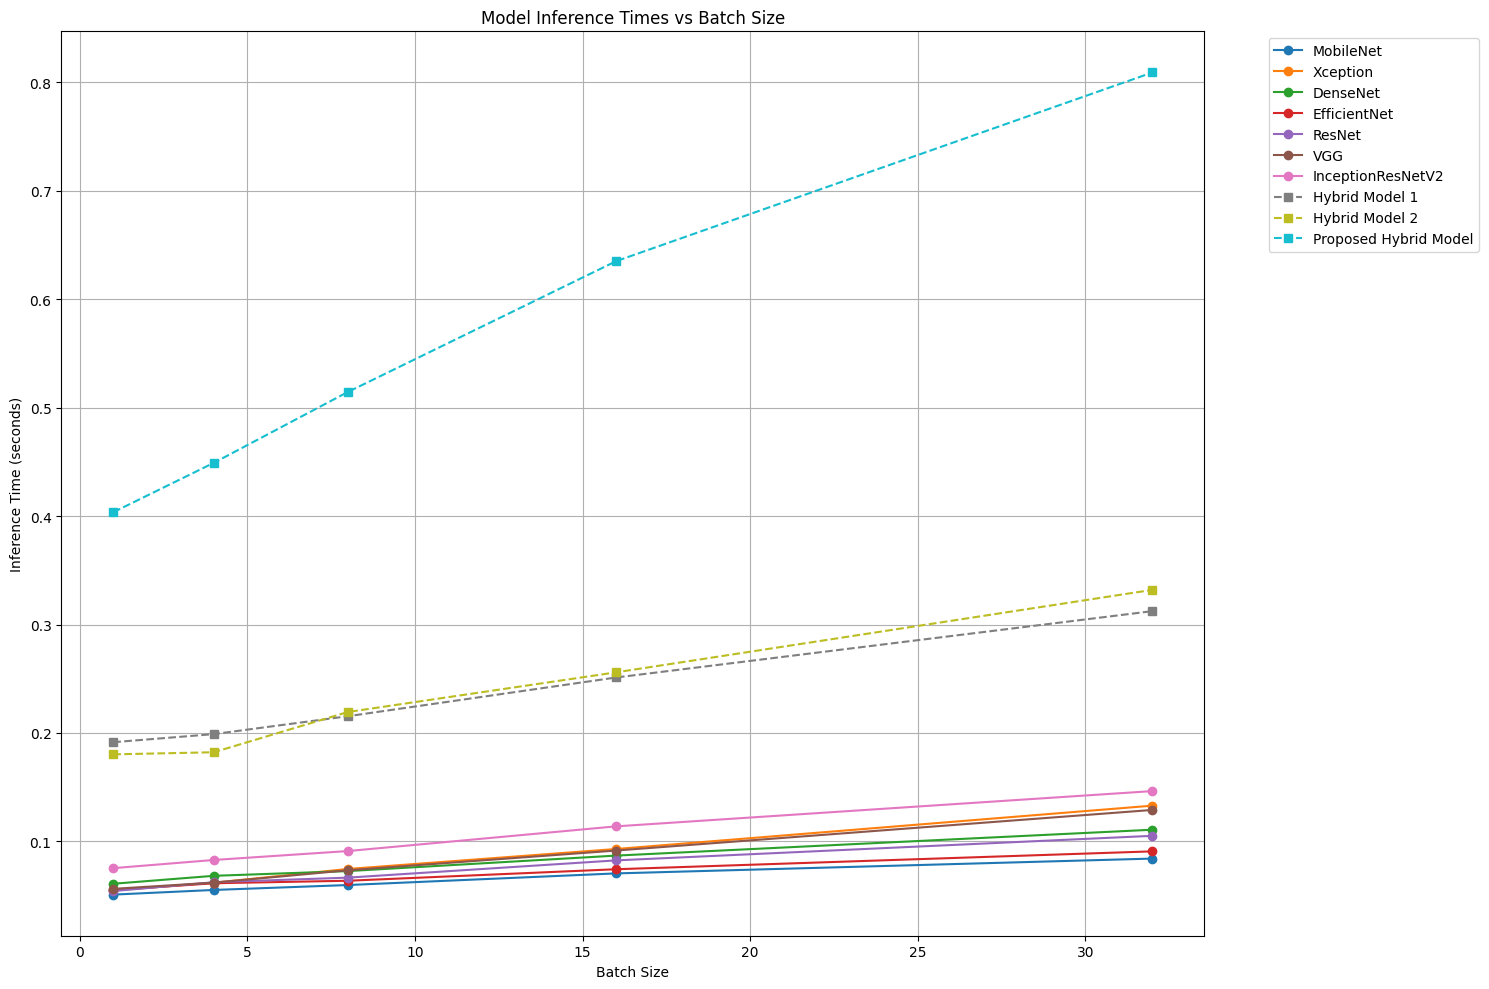


Inference Time Summary (seconds):
                   Model  Batch_1  Per_Sample_1  Batch_4  Per_Sample_4  \
0              MobileNet   0.0510        0.0510   0.0553        0.0138   
1               Xception   0.0548        0.0548   0.0620        0.0155   
2               DenseNet   0.0610        0.0610   0.0683        0.0171   
3           EfficientNet   0.0552        0.0552   0.0615        0.0154   
4                 ResNet   0.0542        0.0542   0.0624        0.0156   
5                    VGG   0.0563        0.0563   0.0620        0.0155   
6      InceptionResNetV2   0.0754        0.0754   0.0829        0.0207   
7         Hybrid Model 1   0.1915        0.1915   0.1990        0.0497   
8         Hybrid Model 2   0.1803        0.1803   0.1822        0.0456   
9  Proposed Hybrid Model   0.4035        0.4035   0.4490        0.1123   

   Batch_8  Per_Sample_8  Batch_16  Per_Sample_16  Batch_32  Per_Sample_32  
0   0.0598        0.0075    0.0705         0.0044    0.0842         0.002

In [ ]:
import tensorflow as tf
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def evaluate_inference_time(model, X_sample, batch_size=1):
    """Measure inference time for a single model on preprocessed data"""

    if len(X_sample) > batch_size:
        X_batch = X_sample[:batch_size]
    else:
        X_batch = X_sample
        

    _ = model.predict(X_batch, verbose=0)
    

    start_time = time.time()
    predictions = model.predict(X_batch, verbose=0)
    inference_time = time.time() - start_time
    
    print(f"Inference time for batch size {batch_size}: {inference_time:.4f} seconds")
    print(f"Average time per sample: {inference_time/batch_size:.4f} seconds")
    
    return inference_time

def evaluate_ensemble_inference_time(models, X_sample, batch_size=1):
    """Measure inference time for ensemble models on preprocessed data"""

    if len(X_sample) > batch_size:
        X_batch = X_sample[:batch_size]
    else:
        X_batch = X_sample
        

    for model in models:
        _ = model.predict(X_batch, verbose=0)
    

    start_time = time.time()
    ensemble_preds = np.mean([model.predict(X_batch, verbose=0) for model in models], axis=0)
    inference_time = time.time() - start_time
    
    print(f"Ensemble inference time for batch size {batch_size}: {inference_time:.4f} seconds")
    print(f"Average time per sample: {inference_time/batch_size:.4f} seconds")
    
    return inference_time

def evaluate_models_inference(models, X_val, batch_sizes=[1, 4, 8, 16, 32]):
    """Evaluate inference time for multiple models with different batch sizes"""
    results = {}
    
    for model, name in models:
        print(f"\nEvaluating {name}...")
        batch_times = {}
        
        for batch_size in batch_sizes:
            print(f"\nBatch size: {batch_size}")
            inference_time = evaluate_inference_time(model, X_val, batch_size)
            batch_times[batch_size] = inference_time
            
        results[name] = batch_times
        
    return results

def evaluate_hybrid_models_inference(hybrid_models, X_val, batch_sizes=[1, 4, 8, 16, 32]):
    """Evaluate inference time for hybrid models with different batch sizes"""
    hybrid_results = {}
    
    for models_list, name in hybrid_models:
        print(f"\nEvaluating Hybrid Model: {name}...")
        batch_times = {}
        
        for batch_size in batch_sizes:
            print(f"\nBatch size: {batch_size}")
            inference_time = evaluate_ensemble_inference_time(models_list, X_val, batch_size)
            batch_times[batch_size] = inference_time
            
        hybrid_results[name] = batch_times
        
    return hybrid_results  # Fixed: returning hybrid_results instead of results

def plot_inference_times(individual_results, hybrid_results, batch_sizes):
    """Create visualization of inference times"""
    plt.figure(figsize=(15, 10))
    
    # Plot individual models
    for model_name, times in individual_results.items():
        plt.plot(batch_sizes, [times[b] for b in batch_sizes], 
                marker='o', label=f'{model_name}')
    

    for model_name, times in hybrid_results.items():
        plt.plot(batch_sizes, [times[b] for b in batch_sizes], 
                marker='s', linestyle='--', label=f'{model_name}')
    
    plt.xlabel('Batch Size')
    plt.ylabel('Inference Time (seconds)')
    plt.title('Model Inference Times vs Batch Size')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    

    summary_data = []
    for model_name, times in {**individual_results, **hybrid_results}.items():
        row = {'Model': model_name}
        for batch_size in batch_sizes:
            row[f'Batch_{batch_size}'] = times[batch_size]
            row[f'Per_Sample_{batch_size}'] = times[batch_size] / batch_size
        summary_data.append(row)
    
    summary_df = pd.DataFrame(summary_data)
    print("\nInference Time Summary (seconds):")
    print(summary_df.round(4))

def main():
    # Define your models
    individual_models = [
        (mobilenet_model, "MobileNet"),
        (xception_model, "Xception"),
        (densenet_model, "DenseNet"),
        (efficient_model, "EfficientNet"),
        (resnet_model, "ResNet"),
        (vgg_model, "VGG"),
        (inceptionresnetV2_model, "InceptionResNetV2")
    ]

    hybrid_models = [
        ([resnet_model, xception_model, mobilenet_model], "Hybrid Model 1"),
        ([densenet_model, efficient_model, vgg_model], "Hybrid Model 2"),
        ([densenet_model, efficient_model, vgg_model, resnet_model,
          xception_model, mobilenet_model, inceptionresnetV2_model], "Proposed Hybrid Model")
    ]

    # Define batch sizes to test
    batch_sizes = [1, 4, 8, 16, 32]
    
    # Evaluate inference times
    print("\nEvaluating Individual Models...")
    individual_results = evaluate_models_inference(individual_models, X_val, batch_sizes)
    
    print("\nEvaluating Hybrid Models...")
    hybrid_results = evaluate_hybrid_models_inference(hybrid_models, X_val, batch_sizes)
    
    # Plot results
    plot_inference_times(individual_results, hybrid_results, batch_sizes)

if __name__ == "__main__":
    print("\nSetting up GPU...")
    print(f"TensorFlow version: {tf.__version__}")
    print("GPU Available: ", tf.config.list_physical_devices('GPU'))
    main()